In [3]:
import mne
raw = mne.io.read_raw_eeglab(
    "data/sub-03_task-ImaginedEmotion_eeg.set",
    preload=True
)
events, event_id = mne.events_from_annotations(raw)


Reading /Users/jranji/Desktop/ML Project/Code/data/sub-03_task-ImaginedEmotion_eeg.fdt
Reading 0 ... 1251327  =      0.000 ...  4887.996 secs...
Used Annotations descriptions: [np.str_('ExitThankYou'), np.str_('FeelingItInstructionsButton'), np.str_('ImaginationSuggestions'), np.str_('InstructionsForEnding'), np.str_('anger'), np.str_('awe'), np.str_('compassion'), np.str_('content'), np.str_('disgust'), np.str_('enter'), np.str_('excite'), np.str_('exit'), np.str_('fear'), np.str_('frustration'), np.str_('grief'), np.str_('happy'), np.str_('jealousy'), np.str_('joy'), np.str_('love'), np.str_('postbase'), np.str_('postbase_instruct'), np.str_('prebase'), np.str_('prebase_instruct'), np.str_('press'), np.str_('press1'), np.str_('relax'), np.str_('relief'), np.str_('sad')]


In [6]:
x = [x[0] for x in events]
y = [x[2] for x in events]

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.DataFrame({"Event_id": y, "Time": x})
df2 = pd.DataFrame.from_dict(event_id, orient='index').reset_index().rename(columns={'index': 'Event', 0: 'Event_id'})

In [30]:
big_df = df.merge(df2, on='Event_id')

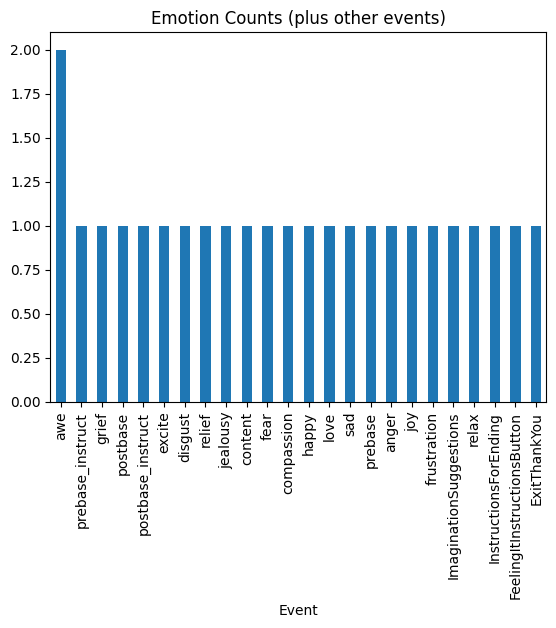

In [53]:
big_df.Event.value_counts().drop(["press", "press1", "exit", "enter"], axis = 0).plot(kind='bar', title="Emotion Counts (plus other events)") #Removing the big counts of non-emotion events
plt.show()

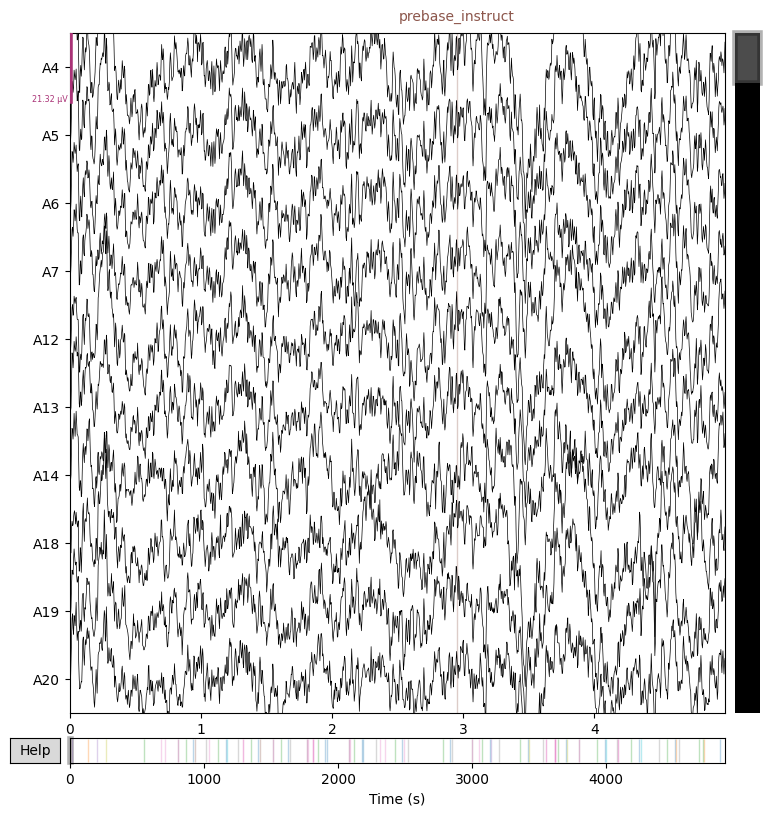

In [ ]:
eeg = raw.get_data()

raw.plot(
    n_channels=10,
    duration=5,
    scalings="auto"
)
plt.show()

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mne/viz/utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
/var/folders/_b/t1t41vkj1vngyhrv0pg1fbg80000gn/T/ipykernel_40566/749381644.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  raw.compute_psd(fmax=50, average="mean").plot().show()


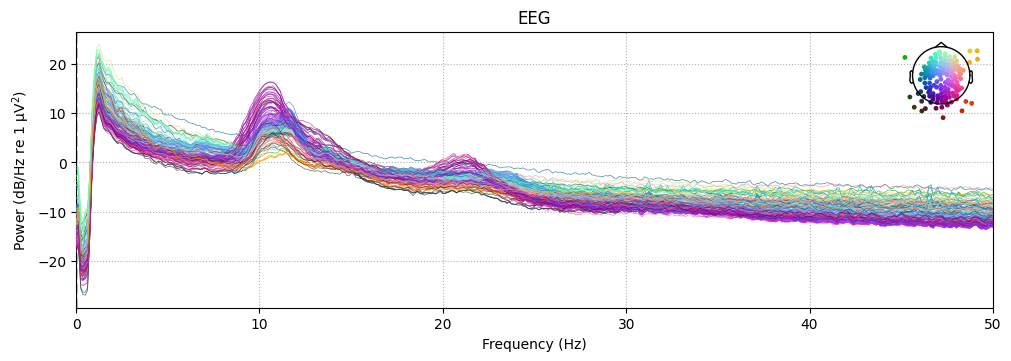

In [61]:
raw.compute_psd(fmax=50, average="mean").plot().show()